# <font color = 'green'>Modified Euler</font>
A first order diffarential equation can be written as 
$$\frac{dy}{dx}=f(x, y)$$
It is given at $x = x_0$, $y=y_0$. So the next value of $y$ i.e, $y_1$ is given by

\begin{equation} \tag{1} 
\begin{split}
y_1 & = y_0 + \int_{x_0}^{x_1}\frac{dy}{dx} dx \\
 & = y_0 + \int_{x_0}^{x_1}f(x, y) dx
\end{split}
\end{equation}

Now the integral can be solved in many ways numerically. What we do for Euler method is that, $f(x, y)\approx f(x_0, y_0)$. But we can **modify** it better way. That is 

\begin{equation}  \label{2} \tag{2}
\int_{x_0}^{x_1}f(x, y) dx = \frac{h}{2}(f(x_0, y_0)+f(x_1, y_1))
\end{equation}
 
You may recognize it is the **Trapezoidal method** for numerical integration($h$ is spacing between $x_0$ and $x_1$). <font color = 'gray'>But how can we put $y_1$ in \ref{2} without knowing it? </font> Where predict and correct concept/method come into picture. Crack is that you going to compute $y_1$ using Euler method and will put it into \ref{2}. Then we can compute new(rather good $y_1$) $y_1$.

**Predict**:
Use Euler method for first $y_1$. i.e, 
\begin{equation} \label{3} \tag{3}
y_1^{(0)} = y_0 + h\frac{dy}{dx}\Bigr\rvert_{x = x_0}
\end{equation}

**Correct**:
After computing $y_1$ from \ref{3} put it in \ref{2},
\begin{equation}  
y_1^{(1)} = y_0 + \frac{h}{2}(f(x_0, y_0)+f(x_1, y_1^{(0)}))
\end{equation}

It is recurssion kind of problem so ultimate equation becomes,

<font color = 'Green'>
\begin{equation}  \tag{4}
\boxed {y_1^{(n)} = y_0 + \frac{h}{2}(f(x_0, y_0)+f(x_1, y_1^{(n-1)}))}
\end{equation}
</font>

$n$ is something I think it is the main culprit for accuracy.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def ModifiedEuler(xi, yi, h, xf, f, err):
    '''1st order diffarential equation solver.
    Function arguments:
    xi = inital x
    yi = value of y at xi
    h = increment
    xf = final x
    f = diffaretial equation; Try to use ```lambda``` for inline function defination.
    err = how accurately you want to calculate the y's '''
    xx, yy = [xi], [yi]
    while (xf - xi) > 0:

        #Predict
        y_ = yi + h*f(xi, yi)
        diff = 100
        while diff > err:
           #Correct
            y = yi + 0.5*h*(f(xi, yi) + f(xi+h, y_))
            diff = abs(y - y_)
            y_ = y

        yi = y 
        xi += h

        xx.append(xi)
        yy.append(yi)
    return xx, yy

In [3]:
def Euler(xi, yi, h, xf, f):
    
    xx, yy = [xi], [yi]
    while(xf > xi):
        yi += h*f(xi, yi)
        xi += h
        
        xx.append(xi)
        yy.append(yi)
    return xx, yy


### Problem 1:
Solve the diffarential equation: $y'(x)=-y + x + 2$ with initial condtion $y(0)=2$. Solution will be $y(x)=e^-{x} + x + 1$. Both Euler and modified Euler. Take $h = 0.5$.

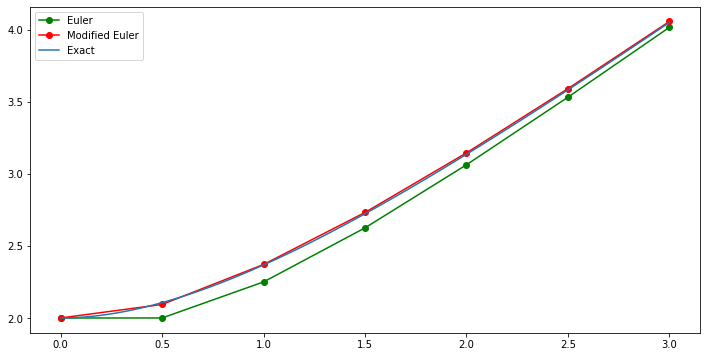

In [4]:
xi = 0; yi = 2; h = 0.5; xf = 3
def f(x, y): return -y + x + 2  #Diffarential equation

xxE, yyE = Euler(xi, yi, h, xf, f)
xxM, yyM = ModifiedEuler(xi, yi, h, xf, f, 0.1)

#Exact Solution
x = np.linspace(xi, xf, 100)
y = np.exp(-x) + x + 1
#Plotting
plt.figure(figsize = (12, 6))
plt.plot(xxE, yyE, "-go", label = "Euler")
plt.plot(xxM, yyM, "-ro", label = "Modified Euler")
plt.plot(x, y, label = "Exact")
plt.legend(loc = 'best')
plt.show()

You can see how powerful modified Euler is..